# An Overview of the Spanish Energy Generation

In [3]:
import pandas as pd #!

df_energy = pd.read_csv('all-technology_2019-2021.csv', index_col=0)
df_energy

technology  year  month  day  hour  generation_mwh
0                 Carbon  2019      1    1     0          1867.0
1                 Carbon  2019      1    1     1          1618.0
...                  ...   ...    ...  ...   ...             ...
420862  Other Renewables  2021     12   31    22           607.5
420863  Other Renewables  2021     12   31    23           591.6

[420864 rows x 6 columns]

## [ ] Select the data from 2019

### Filter the rows

In [4]:
mask = df_energy.year == 2019

df = df_energy[mask].copy()
df

technology  year  month  day  hour  generation_mwh
0                 Carbon  2019      1    1     0          1867.0
1                 Carbon  2019      1    1     1          1618.0
...                  ...   ...    ...  ...   ...             ...
403318  Other Renewables  2019     12   31    22           367.6
403319  Other Renewables  2019     12   31    23           365.2

[140160 rows x 6 columns]

### Drop the column `year`

In [5]:
df = df.drop(columns='year')
df

technology  month  day  hour  generation_mwh
0                 Carbon      1    1     0          1867.0
1                 Carbon      1    1     1          1618.0
...                  ...    ...  ...   ...             ...
403318  Other Renewables     12   31    22           367.6
403319  Other Renewables     12   31    23           365.2

[140160 rows x 5 columns]

### Reset the index to start from 0

In [6]:
df = df.reset_index(drop=True)
df

technology  month  day  hour  generation_mwh
0                 Carbon      1    1     0          1867.0
1                 Carbon      1    1     1          1618.0
...                  ...    ...  ...   ...             ...
140158  Other Renewables     12   31    22           367.6
140159  Other Renewables     12   31    23           365.2

[140160 rows x 5 columns]

## In total, how much energy was generated?

In [7]:
df.generation_mwh.sum()

257726126.50000003

## [ ] Which was the technology that generated more energy?

### Data processing

#### Calculate the total generation by each technology

In [8]:
res = df.groupby('technology').generation_mwh.sum()
res

technology
Carbon           10863640.8
Cogeneration     29552856.6
                    ...    
Total Exports   -13881891.4
Total Imports    20746477.0
Name: generation_mwh, Length: 16, dtype: float64

#### Sort the most used technologies at the beginning of the table

In [9]:
res = res.sort_values(ascending=False)
res

technology
Nuclear            55921440.9
Eolic              53090087.3
                      ...    
Other Residuals     1064666.4
Total Exports     -13881891.4
Name: generation_mwh, Length: 16, dtype: float64

#### Reset the index to transform the previous object to a `DataFrame`

In [10]:
dfres = res.reset_index()
dfres

technology  generation_mwh
0           Nuclear      55921440.9
1             Eolic      53090087.3
..              ...             ...
14  Other Residuals       1064666.4
15    Total Exports     -13881891.4

[16 rows x 2 columns]

### Visualize the data with a bar plot

In [11]:
import plotly.express as px

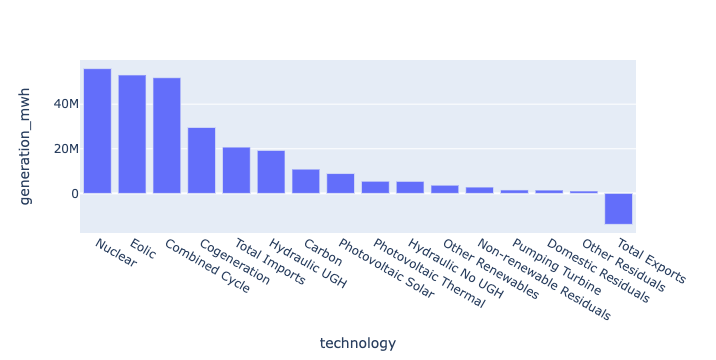

In [12]:
px.bar(data_frame=dfres, x='technology', y='generation_mwh')

### Customize the bar plot

#### Make the bars horizontal

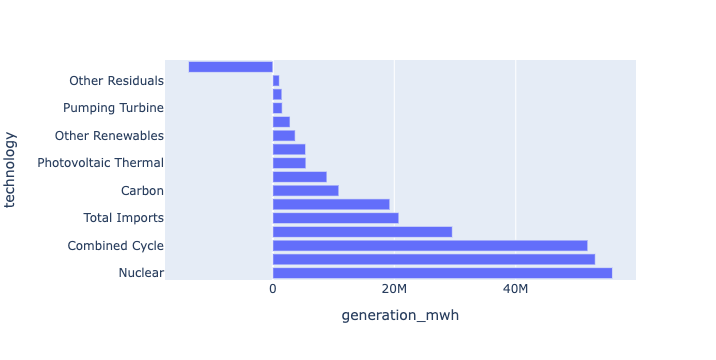

In [13]:
px.bar(data_frame=dfres, y='technology', x='generation_mwh')

#### Sort the data and visualize it again

In [14]:
dfres = dfres.sort_values('generation_mwh')
dfres

technology  generation_mwh
15    Total Exports     -13881891.4
14  Other Residuals       1064666.4
..              ...             ...
1             Eolic      53090087.3
0           Nuclear      55921440.9

[16 rows x 2 columns]

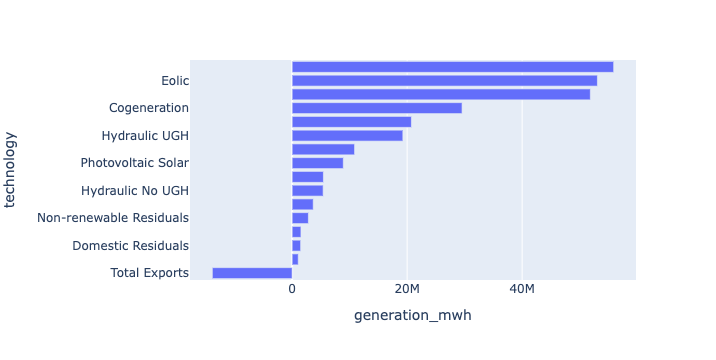

In [15]:
px.bar(data_frame=dfres, y='technology', x='generation_mwh')

### Is a pie plot better for this data?

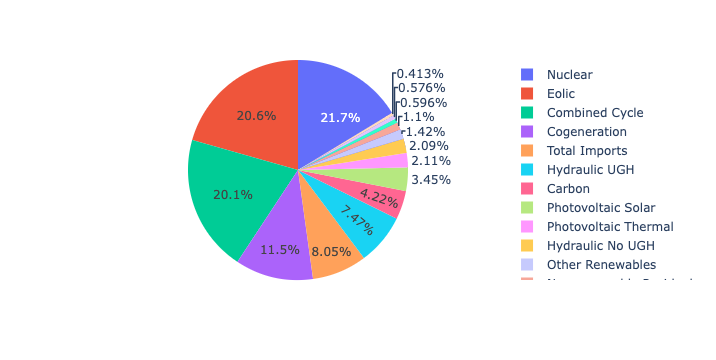

In [16]:
px.pie(data_frame=dfres, names='technology', values='generation_mwh')

## [ ] Which was the month that demanded more energy?

### Data processing

In [17]:
dfres = df.groupby('month').generation_mwh.sum().reset_index()

In [18]:
dfres

month  generation_mwh
0       1      23923049.3
1       2      20853591.0
..    ...             ...
10     11      21624901.9
11     12      22022890.2

[12 rows x 2 columns]

### Data visualization

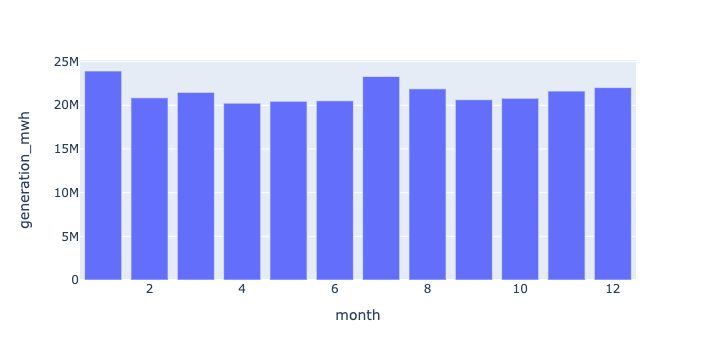

In [19]:
px.bar(data_frame=dfres, x='month', y='generation_mwh')

## [ ] Which was the month-technology that generated more energy?

### Data processing

In [20]:
dfres = df.groupby(['month', 'technology']).generation_mwh.sum().reset_index()
dfres

month     technology  generation_mwh
0        1         Carbon       3098818.6
1        1   Cogeneration       2650234.1
..     ...            ...             ...
190     12  Total Exports      -1508895.4
191     12  Total Imports       1954801.9

[192 rows x 3 columns]

### Data visualization

#### Create a bar plot

##### Differentiate each technology with a `color`

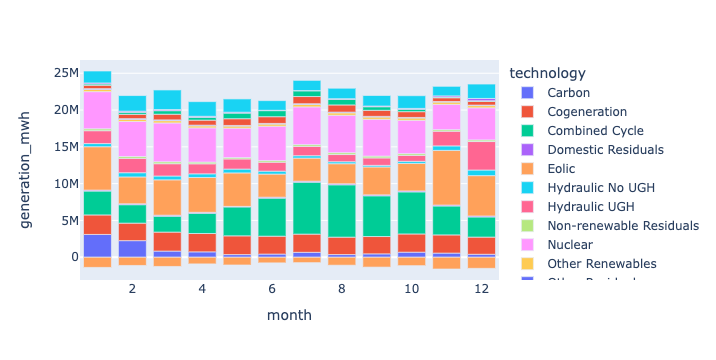

In [21]:
px.bar(data_frame=dfres, x='month', y='generation_mwh', color='technology')

##### Differentiate each technology with a `facet_col`

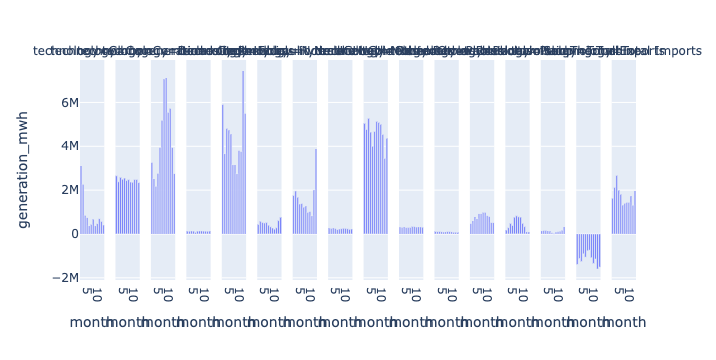

In [22]:
px.bar(data_frame=dfres, x='month', y='generation_mwh', facet_col='technology')

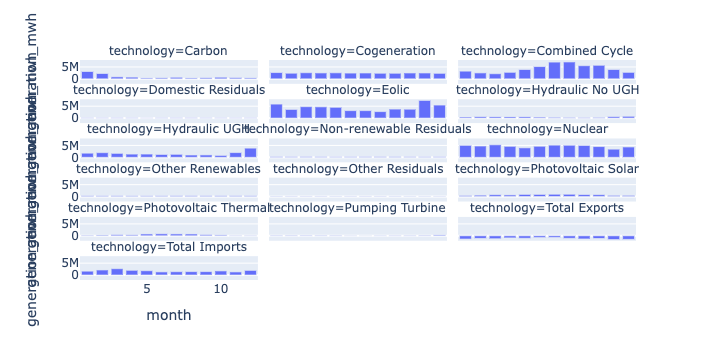

In [23]:
px.bar(data_frame=dfres, x='month', y='generation_mwh',
       facet_col='technology', facet_col_wrap=3)

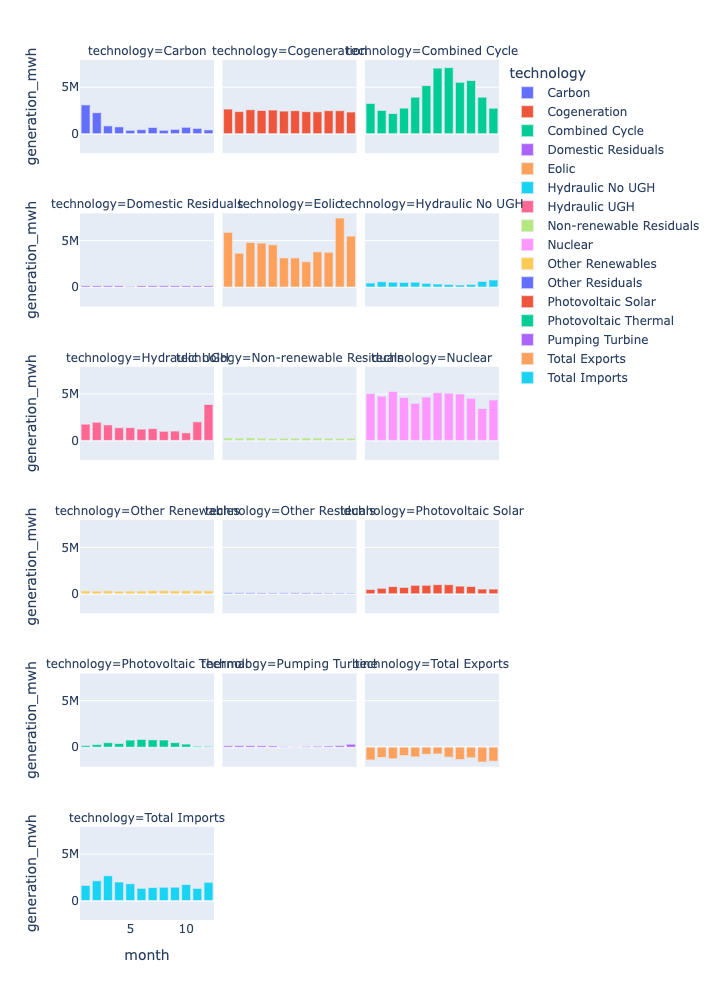

In [24]:
px.bar(data_frame=dfres, x='month', y='generation_mwh',
       facet_col='technology', facet_col_wrap=3, height=1000, color='technology')

#### Create an area plot

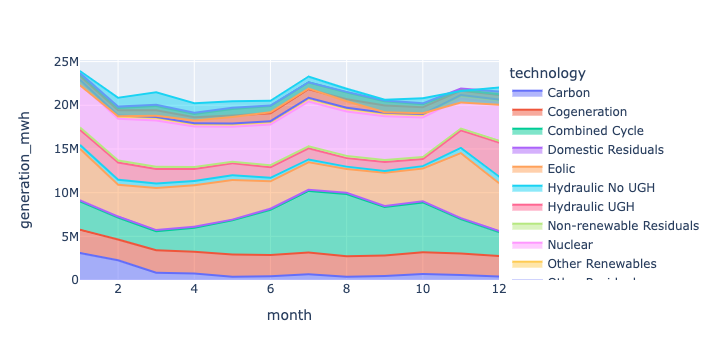

In [25]:
px.area(data_frame=dfres, x='month', y='generation_mwh', color='technology')

## [ ] How much energy was generated each hour of the year?

### Data Processing

In [26]:
res = df.groupby(['month', 'day', 'hour']).generation_mwh.sum()

In [27]:
res

month  day  hour
1      1    0       23817.0
            1       22450.8
                     ...   
12     31   22      25800.6
            23      24005.8
Name: generation_mwh, Length: 8759, dtype: float64

In [28]:
365*24

8760

### Data visualization

#### Create a histogram

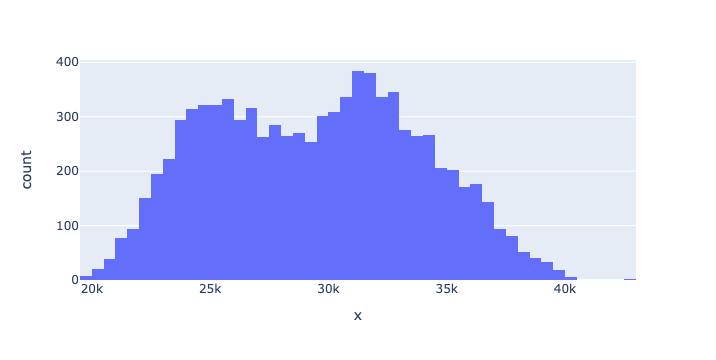

In [29]:
px.histogram(x=res)

#### Create a boxplot

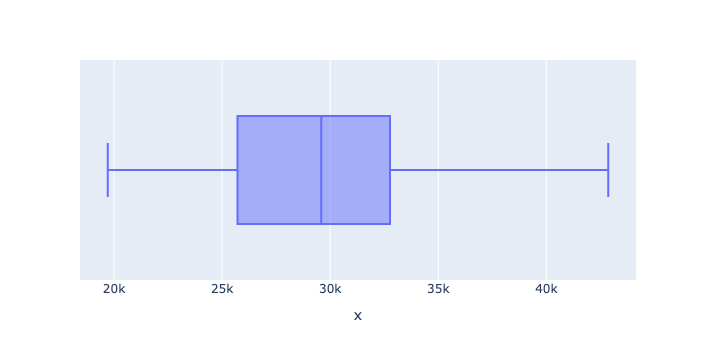

In [30]:
px.box(x=res)